<a href="https://colab.research.google.com/github/deelilah/Supervised-Learning-Test-1/blob/master/6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Supervised Learning with Exploratory Data Analysis**

# a.) **Defining the Question**

As a football analyst in a company i was requested to analyse - Mchezopesa Ltd football team and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away. 

And whether or not the game is friendly (include rank in your training).



# b.**) Metric of Success**

The metric of success will be accomplished when i am able to give adequate result of the game between the two teams based on who is home and away.Furthermore show if the scores are for the friendly or real match. and the scores by each team.

# c.) **Understanding the context**
The new model for calculating the FIFA/Coca-Cola World Ranking (FWR) was developed over two years
during which time a large number of different algorithms was tested and extensively discussed.
Throughout this review and consultation process, the main aim was to identify an algorithm that is not
only intuitive, easy to understand and improves overall accuracy of the formula, but also addresses
feedback received about the previous model and provides fair and equal opportunities for all teams
across all confederations to ascend the FWR.




# d.) **Record the Experiment Design**


Data Cleaning

Exploratory Data Analysis

Perform your EDA

Perform any necessary feature engineering 

Check of multicollinearity

Start building the model

Cross-validate the model

Compute RMSE

Create residual plots for your models, and assess their 
heteroscedasticity using Bartlett’s test

# Data Relevance
The data was enough but its documentation was shallow,it didnt describe all variables and this brought about some challenges.




# 1.0 DATA CLEANING AND PREPARATION

# 1.1 Importing Libraries and Reading Data

In [0]:
#importing Data
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# 1.2 Reading the data

In [0]:
#reading the first dataset
fifa=pd.read_csv('fifa_ranking.csv')
fifa

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


Evaluating and checking the required columns

In [0]:
#from the fifa dataset i will pick the relevant columns that will helpme in my problem statement
columns = ['rank','previous_points','country_full','rank_date','total_points']
fifa_new = fifa[columns]
fifa_new.head()

,rank,previous_points,country_full,rank_date,total_points
0,1,57,Germany,1993-08-08,0.0
1,2,57,Italy,1993-08-08,0.0
2,3,50,Switzerland,1993-08-08,0.0
3,4,55,Sweden,1993-08-08,0.0
4,5,51,Argentina,1993-08-08,0.0


In [0]:
fifa_new.tail()

,rank,previous_points,country_full,rank_date,total_points
57788,206,0,Anguilla,2018-06-07,0.0
57789,206,0,Bahamas,2018-06-07,0.0
57790,206,0,Eritrea,2018-06-07,0.0
57791,206,0,Somalia,2018-06-07,0.0
57792,206,0,Tonga,2018-06-07,0.0


In [0]:
fifa_new.describe()

,rank,previous_points,total_points
count,57793.000000,57793.000000,57793.000000
mean,101.628086,332.302926,122.068637
std,58.618424,302.872948,260.426863
min,1.000000,0.000000,0.000000
25%,51.000000,56.000000,0.000000
50%,101.000000,272.000000,0.000000
75%,152.000000,525.000000,92.790000
max,209.000000,1920.000000,1775.030000


In [0]:
fifa_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 5 columns):
rank               57793 non-null int64
previous_points    57793 non-null int64
country_full       57793 non-null object
rank_date          57793 non-null object
total_points       57793 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.2+ MB


# 1.3 Data Uniformity

In [0]:
#change the data datatype to datetime
fifa_new['rank_date'] = pd.to_datetime(fifa_new['rank_date'], errors='coerce')
fifa_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 5 columns):
rank               57793 non-null int64
previous_points    57793 non-null int64
country_full       57793 non-null object
rank_date          57793 non-null datetime64[ns]
total_points       57793 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.2+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
#from the description country_full and home team have similar description
#rename the country_full column to home team to enable merging the two tables
fifa_new.rename(columns={'country_full':'home_team'}, inplace=True)
fifa_new.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,rank,previous_points,home_team,rank_date,total_points
0,1,57,Germany,1993-08-08,0.0
1,2,57,Italy,1993-08-08,0.0
2,3,50,Switzerland,1993-08-08,0.0
3,4,55,Sweden,1993-08-08,0.0
4,5,51,Argentina,1993-08-08,0.0


In [0]:
#now to look at the other dataset
results=pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [0]:
#drop unecessary columns 
results.drop(['city','country'], axis=1,inplace=True)

In [0]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,False
1,1873-03-08,England,Scotland,4,2,Friendly,False
2,1874-03-07,Scotland,England,2,1,Friendly,False
3,1875-03-06,England,Scotland,2,2,Friendly,False
4,1876-03-04,Scotland,England,3,0,Friendly,False


In [0]:
#checking the info for right datatypes
results.info()
#date to be converted to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 7 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(4)
memory usage: 1.9+ MB


In [0]:
#change datatype to datetime
results['date'] = pd.to_datetime(results['date'], errors='coerce')
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 7 columns):
date          40839 non-null datetime64[ns]
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(3)
memory usage: 1.9+ MB


In [0]:
fifa_new['rank_date']


0       1993-08-08
1       1993-08-08
2       1993-08-08
3       1993-08-08
4       1993-08-08
           ...    
57788   2018-06-07
57789   2018-06-07
57790   2018-06-07
57791   2018-06-07
57792   2018-06-07
Name: rank_date, Length: 57793, dtype: datetime64[ns]

In [0]:
results['date']

0       1872-11-30
1       1873-03-08
2       1874-03-07
3       1875-03-06
4       1876-03-04
           ...    
40834   2019-07-18
40835   2019-07-18
40836   2019-07-19
40837   2019-07-19
40838   2019-07-20
Name: date, Length: 40839, dtype: datetime64[ns]

In [0]:
#separating the year from the date columns in both datasets.
#i will use years from 1993 to 2018 which is the last date on fifa.csv 
results['year']=results['date'].dt.year
results['month']=results['date'].dt.month
fifa_new['year']=fifa_new['rank_date'].dt.year
fifa_new['month']=fifa_new['rank_date'].dt.month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
#checking the data 
fifa_new.head(1)

,rank,previous_points,home_team,rank_date,total_points,year,month
0,1,57,Germany,1993-08-08,0.0,1993,8


In [0]:
results.head(1)

,date,home_team,away_team,home_score,away_score,tournament,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,False


#1.4 External Validation

In [0]:
#to drop the years before 1993 and till 2018 this is where our data reached in both dataset and when the model being tested was put to test.
results=results[results['date']>='1993-08-08']
results=results[results['date']<= '2018-06-07']

In [0]:
fifa_new.shape

(57793, 7)

In [0]:
results.shape

(21919, 9)

#2.0 EXPLORATORY DATA ANALYSIS

In [0]:
#merge the two datasets via home_team and the separated year,month
m_dataset= pd.merge(results,fifa_new,how='left',on=['home_team', 'year', 'month'])
m_dataset.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,rank,previous_points,rank_date,total_points
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,59.0,13.0,1993-08-08,0.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,8.0,55.0,1993-08-08,0.0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,1993,8,35.0,23.0,1993-08-08,0.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,1993,8,65.0,23.0,1993-08-08,0.0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,1993,8,67.0,22.0,1993-08-08,0.0


In [0]:
# changing rank to home team rank
m_dataset.rename(columns={'rank':'home_team_rank'}, inplace=True)
m_dataset.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_team_rank,previous_points,rank_date,total_points
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,59.0,13.0,1993-08-08,0.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,8.0,55.0,1993-08-08,0.0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,1993,8,35.0,23.0,1993-08-08,0.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,1993,8,65.0,23.0,1993-08-08,0.0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,1993,8,67.0,22.0,1993-08-08,0.0


In [0]:
#fifa data we rename home team to away team so we can get it to merge and draw the rank from it
fifa_new.rename({'home_team': 'away_team'},axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [0]:
#this is thedataset we have after all the changes
final_dataset= pd.merge(m_dataset,fifa_new, how='left', on=['away_team', 'year', 'month'])
final_dataset

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_team_rank,previous_points_x,rank_date_x,total_points_x,rank,previous_points_y,rank_date_y,total_points_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,59.0,13.0,1993-08-08,0.0,22.0,47.0,1993-08-08,0.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,8.0,55.0,1993-08-08,0.0,14.0,42.0,1993-08-08,0.0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,1993,8,35.0,23.0,1993-08-08,0.0,94.0,4.0,1993-08-08,0.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,1993,8,65.0,23.0,1993-08-08,0.0,86.0,16.0,1993-08-08,0.0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,1993,8,67.0,22.0,1993-08-08,0.0,5.0,51.0,1993-08-08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22108,2018-06-07,Abkhazia,United Koreans in Japan,2,0,CONIFA World Football Cup,True,2018,6,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN
22109,2018-06-07,Barawa,Panjab,0,5,CONIFA World Football Cup,False,2018,6,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN
22110,2018-06-07,Cascadia,Western Armenia,4,0,CONIFA World Football Cup,True,2018,6,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN
22111,2018-06-07,Northern Cyprus,Padania,3,2,CONIFA World Football Cup,True,2018,6,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN


In [0]:
#lets now rename the remainder claiming x to home and y to away
final_dataset.rename(columns={'rank':'away_team_rank','previous_points_x':'home_previous_points','rank_date_x':'home_rank_date',
                      'previous_points_y':'away_previous_points','rank_date_y':'away_rank_date'}, inplace=True)
final_dataset.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_team_rank,home_previous_points,home_rank_date,total_points_x,away_team_rank,away_previous_points,away_rank_date,total_points_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,59.0,13.0,1993-08-08,0.0,22.0,47.0,1993-08-08,0.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,8.0,55.0,1993-08-08,0.0,14.0,42.0,1993-08-08,0.0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,1993,8,35.0,23.0,1993-08-08,0.0,94.0,4.0,1993-08-08,0.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,1993,8,65.0,23.0,1993-08-08,0.0,86.0,16.0,1993-08-08,0.0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,1993,8,67.0,22.0,1993-08-08,0.0,5.0,51.0,1993-08-08,0.0


In [0]:
#drop total points
final_dataset.drop(['total_points_x','total_points_y'],axis=1,inplace=True)

# 2.1 Checking for outliers

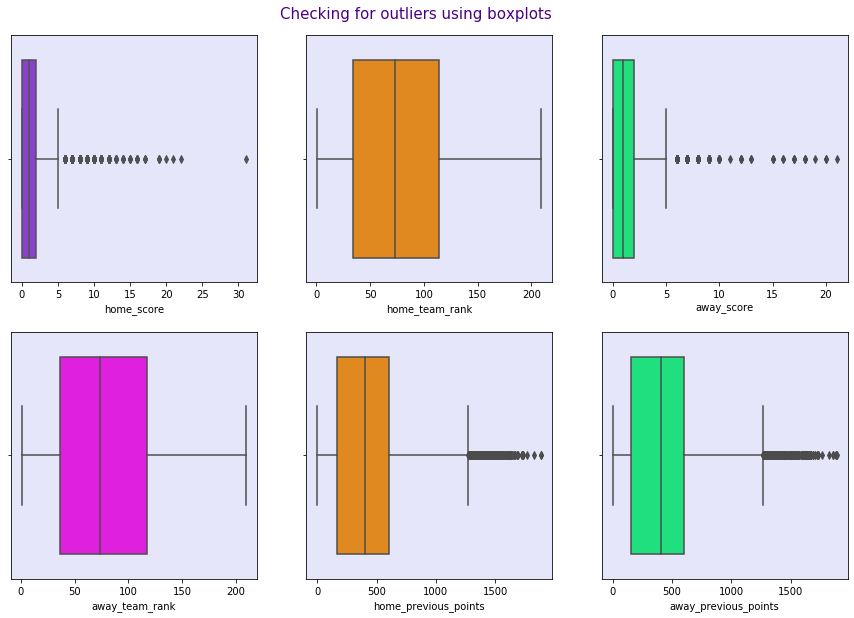

In [0]:

# Creating a list of colors to zip with columns 

column_list = ['home_score', 'home_team_rank', 'away_score', 'away_team_rank','home_previous_points','away_previous_points']
colors = ['blueviolet', 'darkorange', 'springgreen', 'fuchsia','darkorange','springgreen']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), final_dataset, column_list, colors):
  sns.boxplot(final_dataset[column], ax = ax, color = color)
  ax.set_facecolor('lavender') 
  #we wont drop outliers for they take up most of our data

In [0]:
#check for null values
final_dataset.isnull().sum()

date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
neutral                    0
year                       0
month                      0
home_team_rank          3454
home_previous_points    3454
home_rank_date          3454
away_team_rank          3545
away_previous_points    3545
away_rank_date          3545
dtype: int64

In [0]:
#Replacing missing values with median. Reason: Column has outlier hence median is better than mean.
final_dataset['home_team_rank'].fillna((final_dataset['home_team_rank'].median()), inplace=True)
final_dataset['home_previous_points'].fillna((final_dataset['home_previous_points'].median()), inplace=True)
final_dataset['home_rank_date'].fillna((final_dataset['away_team_rank'].median()), inplace=True)
final_dataset['away_team_rank'].fillna((final_dataset['away_team_rank'].median()), inplace=True)
final_dataset['away_previous_points'].fillna((final_dataset['away_previous_points'].median()), inplace=True)


In [0]:
# final_dataset.drop(['away_rank_date'])

In [0]:
#we use this code for checking null values
final_dataset.isnull().sum()

date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
neutral                    0
year                       0
month                      0
home_team_rank             0
home_previous_points       0
home_rank_date             0
away_team_rank             0
away_previous_points       0
away_rank_date          3545
dtype: int64

In [0]:
#we use this code for checking for duplicates in our data.
final_dataset.duplicated

<bound method DataFrame.duplicated of             date        home_team  ... away_previous_points  away_rank_date
0     1993-08-08          Bolivia  ...                 47.0      1993-08-08
1     1993-08-08           Brazil  ...                 42.0      1993-08-08
2     1993-08-08          Ecuador  ...                  4.0      1993-08-08
3     1993-08-08           Guinea  ...                 16.0      1993-08-08
4     1993-08-08         Paraguay  ...                 51.0      1993-08-08
...          ...              ...  ...                  ...             ...
22108 2018-06-07         Abkhazia  ...                406.0             NaT
22109 2018-06-07           Barawa  ...                406.0             NaT
22110 2018-06-07         Cascadia  ...                406.0             NaT
22111 2018-06-07  Northern Cyprus  ...                406.0             NaT
22112 2018-06-07       Kárpátalja  ...                406.0             NaT

[22113 rows x 15 columns]>

In [0]:
#if any they are dropped
final_dataset.drop_duplicates

<bound method DataFrame.drop_duplicates of             date        home_team  ... away_previous_points  away_rank_date
0     1993-08-08          Bolivia  ...                 47.0      1993-08-08
1     1993-08-08           Brazil  ...                 42.0      1993-08-08
2     1993-08-08          Ecuador  ...                  4.0      1993-08-08
3     1993-08-08           Guinea  ...                 16.0      1993-08-08
4     1993-08-08         Paraguay  ...                 51.0      1993-08-08
...          ...              ...  ...                  ...             ...
22108 2018-06-07         Abkhazia  ...                406.0             NaT
22109 2018-06-07           Barawa  ...                406.0             NaT
22110 2018-06-07         Cascadia  ...                406.0             NaT
22111 2018-06-07  Northern Cyprus  ...                406.0             NaT
22112 2018-06-07       Kárpátalja  ...                406.0             NaT

[22113 rows x 15 columns]>

In [0]:
#no duplicates so we check if our data is still intact
final_dataset.shape

(22113, 15)

In [0]:
#now to get back to our problem statement check the tournament friendly games and realstuff

#Tournament type (World cup, Friendly, Other)

def tournament(game):
  if game == 'FIFA World Cup qualification':
    return 'WorldCup'
  if game == 'Friendly':
    return 'Friendly'
  else:
    return 'other'
final_dataset['game']=final_dataset['tournament'].apply(lambda x: tournament(x))

In [0]:
final_dataset.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_team_rank,home_previous_points,home_rank_date,away_team_rank,away_previous_points,away_rank_date,game
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,59.0,13.0,1993-08-08 00:00:00,22.0,47.0,1993-08-08,WorldCup
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,8.0,55.0,1993-08-08 00:00:00,14.0,42.0,1993-08-08,Friendly
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,1993,8,35.0,23.0,1993-08-08 00:00:00,94.0,4.0,1993-08-08,WorldCup
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,1993,8,65.0,23.0,1993-08-08 00:00:00,86.0,16.0,1993-08-08,Friendly
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,1993,8,67.0,22.0,1993-08-08 00:00:00,5.0,51.0,1993-08-08,WorldCup


In [0]:
#use this code to see by how many points does home distance away.Just for eyeballing
final_dataset['subtract'] = final_dataset['home_score'] - final_dataset['away_score']
final_dataset.head(1)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_team_rank,home_previous_points,home_rank_date,away_team_rank,away_previous_points,away_rank_date,game,subtract
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,59.0,13.0,1993-08-08 00:00:00,22.0,47.0,1993-08-08,WorldCup,2


In [0]:
#function to write a column on that can show the scores if won,draw,lost game
def subtract (comment):
  if comment > 0:
    return 'won game'
  if comment < 0:
    return 'lost game'
  elif comment == 0:
    return 'draw'

In [0]:

#Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)
final_dataset['comment']=final_dataset['subtract'].apply(lambda x: subtract(x))
final_dataset.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_team_rank,home_previous_points,home_rank_date,away_team_rank,away_previous_points,away_rank_date,game,subtract,comment
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,59.0,13.0,1993-08-08 00:00:00,22.0,47.0,1993-08-08,WorldCup,2,won game
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,8.0,55.0,1993-08-08 00:00:00,14.0,42.0,1993-08-08,Friendly,0,draw


#2.2 Univariate Analysis

Text(0, 0.5, 'count')

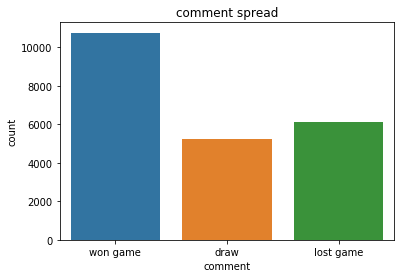

In [0]:
#this checks the wins as we saw from our previous univariate the datais skewed hence the score comments may be uneven
sns.countplot(x='comment',data=final_dataset)
plt.title('comment spread')
plt.xlabel('comment')
plt.ylabel('count')

This shows that the data is uneven as suspected earlier.

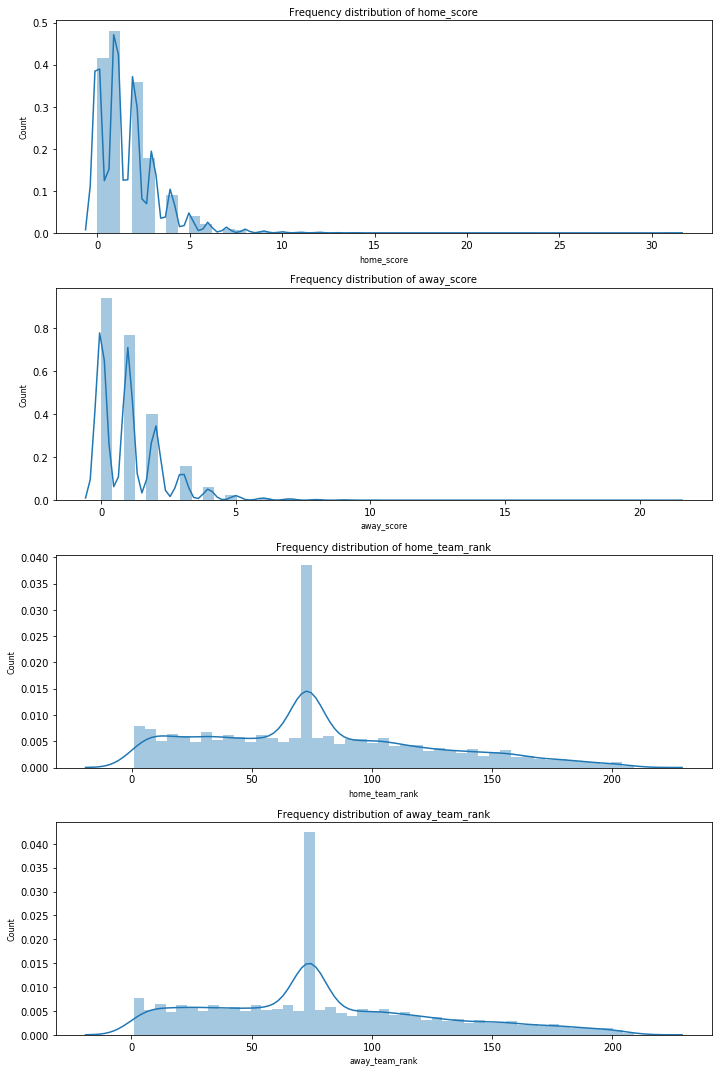

In [0]:
# Plotting distribution of numerical variables
col_names = ['home_score', 'away_score','home_team_rank','away_team_rank']
fig, ax = plt.subplots(len(col_names), figsize=(10,15))

for i, col_val in enumerate(col_names):

    sns.distplot(final_dataset[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

From this we can see that away score and home score are rightly skewed hence our data aint normal or its unevenly distributed.

The ranks are somehow well distributed which is a good normal distribution.

Text(0, 0.5, 'home_score')

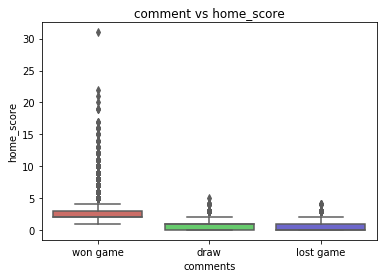

In [0]:
#Home team wins
sns.boxplot(x='comment', y='home_score', data=final_dataset, palette='hls')
plt.title('comment vs home_score')
plt.xlabel('comments')
plt.ylabel('home_score')

Text(0, 0.5, 'away_score')

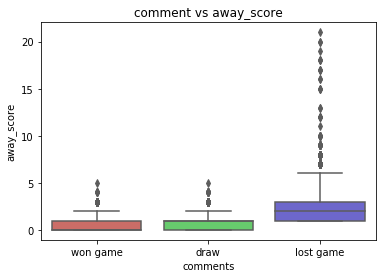

In [0]:
#Away team wins
sns.boxplot(x='comment', y='away_score', data=final_dataset, palette='hls')
plt.title('comment vs away_score')
plt.xlabel('comments')
plt.ylabel('away_score')
#from this we can see home_score had more wins than the away team

from this we can see home_score had more wins than the away team

Text(0, 0.5, 'home_team_rank')

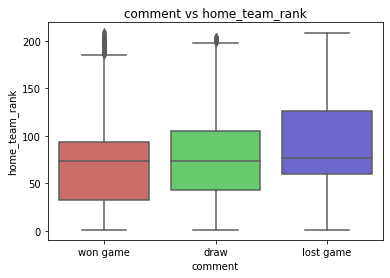

In [0]:
#do the same with the ranking
sns.boxplot(x='comment', y='home_team_rank', data=final_dataset, palette='hls')
plt.title('comment vs home_team_rank')
plt.xlabel('comment')
plt.ylabel('home_team_rank')
#this shows the hometeam is always a rank higher due to the wins

Text(0, 0.5, 'away_team_rank')

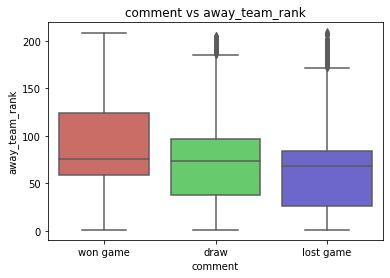

In [0]:
sns.boxplot(x='comment', y='away_team_rank', data=final_dataset, palette='hls')
plt.title('comment vs away_team_rank')
plt.xlabel('comment')
plt.ylabel('away_team_rank')
#this shows the away team is always a rank lower due to the losses

In [0]:
# # how did the home team perform depending on the tournament type?
# home = sb.countplot('win_loss_draw', hue = 'tournament', data = dataset)
# home.set(title = "Distribution of Outcomes depending on Tournament",
#         ylabel = "Win, Lose, or Draw")





#3.0 CORRELATION 






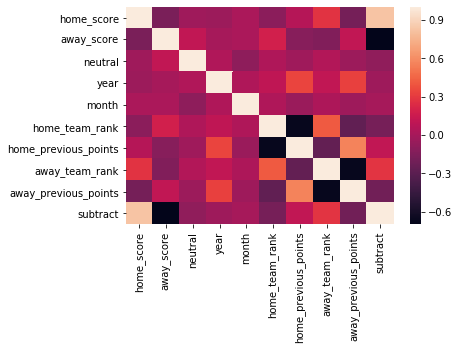

In [0]:
#correlation between the variables

sns.heatmap(final_dataset.corr())


In [0]:
final_dataset.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_team_rank,home_previous_points,home_rank_date,away_team_rank,away_previous_points,away_rank_date,game,subtract,comment
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,59.0,13.0,1993-08-08 00:00:00,22.0,47.0,1993-08-08,WorldCup,2,won game
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,8.0,55.0,1993-08-08 00:00:00,14.0,42.0,1993-08-08,Friendly,0,draw
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,1993,8,35.0,23.0,1993-08-08 00:00:00,94.0,4.0,1993-08-08,WorldCup,5,won game
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,1993,8,65.0,23.0,1993-08-08 00:00:00,86.0,16.0,1993-08-08,Friendly,1,won game
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,1993,8,67.0,22.0,1993-08-08 00:00:00,5.0,51.0,1993-08-08,WorldCup,-2,lost game


#3.1 Encoding categorical data.

In [0]:
#encode the tournament to fit as numericals
from sklearn.preprocessing import LabelEncoder
encode_=LabelEncoder().fit(final_dataset['game'].unique())
class_encode=encode_.classes_
final_dataset['game']=encode_.transform(final_dataset['game'].values)

In [0]:
final_dataset.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_team_rank,home_previous_points,home_rank_date,away_team_rank,away_previous_points,away_rank_date,game,subtract,comment
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,59.0,13.0,1993-08-08 00:00:00,22.0,47.0,1993-08-08,1,2,won game
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,8.0,55.0,1993-08-08 00:00:00,14.0,42.0,1993-08-08,0,0,draw
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,1993,8,35.0,23.0,1993-08-08 00:00:00,94.0,4.0,1993-08-08,1,5,won game
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,1993,8,65.0,23.0,1993-08-08 00:00:00,86.0,16.0,1993-08-08,0,1,won game
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,1993,8,67.0,22.0,1993-08-08 00:00:00,5.0,51.0,1993-08-08,1,-2,lost game


In [0]:
#using variable encode for the comment variable with class encoded to ecode comment column
encode=LabelEncoder().fit(final_dataset['comment'].unique())
class_encoded=encode_.classes_
final_dataset['comment']=encode.transform(final_dataset['comment'].values)
final_dataset.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_team_rank,home_previous_points,home_rank_date,away_team_rank,away_previous_points,away_rank_date,game,subtract,comment
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,59.0,13.0,1993-08-08 00:00:00,22.0,47.0,1993-08-08,1,2,2
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,8.0,55.0,1993-08-08 00:00:00,14.0,42.0,1993-08-08,0,0,0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,1993,8,35.0,23.0,1993-08-08 00:00:00,94.0,4.0,1993-08-08,1,5,2
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,1993,8,65.0,23.0,1993-08-08 00:00:00,86.0,16.0,1993-08-08,0,1,2
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,1993,8,67.0,22.0,1993-08-08 00:00:00,5.0,51.0,1993-08-08,1,-2,1


In [0]:
# if we want to check what an encoded value represents, we just find it in the respective class list
# like this:
# print(class_encode[1])
# print(class_encoded[2])
#use for later reference 

In [0]:
#getting the necessary rows
column=['home_score','away_score','home_team_rank','away_team_rank','game','comment']
new_dataset=final_dataset[column]
new_dataset.head()

,home_score,away_score,home_team_rank,away_team_rank,game,comment
0,3,1,59.0,22.0,1,2
1,1,1,8.0,14.0,0,0
2,5,0,35.0,94.0,1,2
3,1,0,65.0,86.0,0,2
4,1,3,67.0,5.0,1,1


In [0]:
# first we get the correlations
corr = new_dataset.corr()
corr

,home_score,away_score,home_team_rank,away_team_rank,game,comment
home_score,1.000000,-0.165633,-0.100983,0.272785,0.051110,0.511232
away_score,-0.165633,1.000000,0.184668,-0.141860,0.046724,-0.229668
home_team_rank,-0.100983,0.184668,1.000000,0.415841,0.110517,-0.097864
away_team_rank,0.272785,-0.141860,0.415841,1.000000,0.120637,0.193336
game,0.051110,0.046724,0.110517,0.120637,1.000000,0.040506
comment,0.511232,-0.229668,-0.097864,0.193336,0.040506,1.000000


#3.2 Variance Inflation Factor 

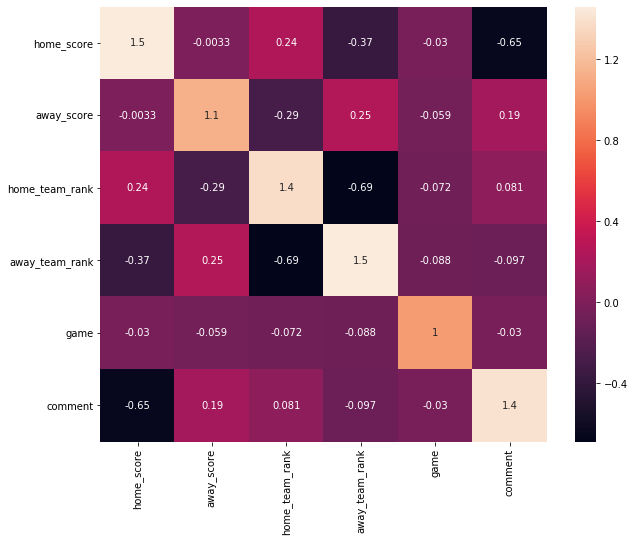

In [0]:
# then we get the Variance Inflation Factor (VIF)
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# using a heatmap to display the results
plt.figure(figsize = (10,8))
sns.heatmap(vif, annot = True)

#4.0 POLYNOMIAL REGRESSION
MODEL 1



#4.1 Predict Home Scores

In [0]:
# getting our attributes and labels
X_home = np.array(new_dataset[['home_team_rank', 'away_team_rank', 'game']])
y_home = new_dataset['home_score']
print(X_home.shape)
print(y_home.shape)

(22113, 3)
(22113,)


In [0]:
# fitting the Linear Regression model to our dataset
from sklearn.linear_model import LinearRegression
reg_line_home = LinearRegression()
reg_line_home.fit(X_home, y_home)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# getting our training and testing sets
from sklearn.model_selection import train_test_split
X_home_train, X_home_test, y_home_train, y_home_test = train_test_split(X_home, y_home, 
                                                    test_size = 0.2, random_state = 0)

In [0]:
y_home_train.shape

(17690,)

In [0]:
# fitting a polynomial regression to our data
from sklearn.preprocessing import PolynomialFeatures
poly_reg_home = PolynomialFeatures(degree = 5)
X_poly_home = poly_reg_home.fit_transform(X_home)

In [0]:
# fitting a linear regression to our polynomial regression
lin_reg_home = LinearRegression()
lin_reg_home.fit(X_poly_home, y_home)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# using home rank 12, away rank 5, and tournament 0 (Friendly)

# predict using linear regression
lin_pred_home = reg_line_home.predict([[12, 5, 0]])
print("Linear Prediction: %d" %lin_pred_home)
print("Linear Prediction (accurate):", lin_pred_home)

# predict using polynomial regression
poly_pred_home = lin_reg_home.predict(poly_reg_home.fit_transform([[12, 5, 0]]))
print("Polynomial Prediction: %d" %poly_pred_home)
print("Polynomial Prediction (accurate):", poly_pred_home)

Linear Prediction: 1
Linear Prediction (accurate): [1.20212964]
Polynomial Prediction: 1
Polynomial Prediction (accurate): [1.1765883]


In [0]:
#test to see its level of accuracy with the ideal data
# we'll use the match between Uruguay and Uzbekistan (index 867)
# so Home Rank 14, Away rank 95, and Tournament Type 0

# predict using linear regression
lin_pred_home2 = reg_line_home.predict([[14, 95, 0]])
print("Linear Prediction: %d" %lin_pred_home2)
print("Linear Prediction (accurate):", lin_pred_home2)

# predict using polynomial regression
poly_pred_home2 = lin_reg_home.predict(poly_reg_home.fit_transform([[14, 95, 0]]))
print("Polynomial Prediction: %d" %poly_pred_home2)
print("Polynomial Prediction (accurate):", poly_pred_home2)

Linear Prediction: 2
Linear Prediction (accurate): [2.39479632]
Polynomial Prediction: 2
Polynomial Prediction (accurate): [2.32136986]


MODEL 2 
#4.2 Predict Away Score

In [0]:
# getting our attributes and labels
X_away = np.array(new_dataset[['home_team_rank', 'away_team_rank', 'game']])
y_away = new_dataset['away_score']
print(X_away.shape)
print(y_away.shape)

(22113, 3)
(22113,)


In [0]:
# fitting the Linear Regression model to our dataset
reg_line_away = LinearRegression()
reg_line_away.fit(X_away, y_away)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# getting our training and testing sets
X_train_away,  X_test_away, y_train_away, y_test_away = train_test_split(X_away, y_away, 
                                                    test_size = 0.2, random_state = 0)


In [0]:
# fitting a polynomial regression to our data
poly_reg_away = PolynomialFeatures(degree = 5)
X_poly_away = poly_reg_away.fit_transform(X_away)

In [0]:
# fitting a linear regression to our polynomial regression
lin_reg_away = LinearRegression()
lin_reg_away.fit(X_poly_away, y_away)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
 #using home rank 12, away rank 5, and tournament 0 (Friendly), like the example in the
# first model

# predict using linear regression
lin_pred_away = reg_line_away.predict([[5, 12, 0]])
print("Linear Prediction: %d" %lin_pred_away)
print("Linear Prediction (accurate):", lin_pred_away)

# predict using polynomial regression
poly_pred_away = lin_reg_away.predict(poly_reg_away.fit_transform([[5, 12, 0]]))
print("Polynomial Prediction: %d" %poly_pred_away)
print("Polynomial Prediction (accurate):", poly_pred_away)

Linear Prediction: 0
Linear Prediction (accurate): [0.92867234]
Polynomial Prediction: 0
Polynomial Prediction (accurate): [0.95547969]


#5.0 LOGISTIC REGRESSION

In [0]:
# since we want to predict whether a match is a win, lose, or draw from the perspective
# of the home team, our target variable will be the 'win_loss_draw' column
log_prediction = new_dataset.drop(columns = [ 'game','home_team_rank', 'away_team_rank'])
log_prediction.head()

,home_score,away_score,comment
0,3,1,2
1,1,1,0
2,5,0,2
3,1,0,2
4,1,3,1


#5.1 Training dataset and multicollinearity

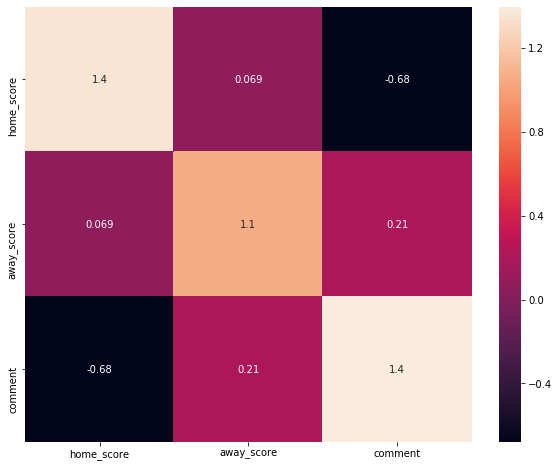

In [0]:
# check for multicollinearity between the variables
wld_vif = pd.DataFrame(np.linalg.inv(log_prediction.corr().values), index = log_prediction.corr().index,
                      columns = log_prediction.corr().columns)

plt.figure(figsize = (10,8))
sns.heatmap(wld_vif, annot = True)

no much correlation hence wont affect the state of the model

In [0]:
# setting up our train and test sets

X_wld = log_prediction.drop('comment', axis = 1)
y_wld = log_prediction['comment']

print(X_wld.shape)
print(y_wld.shape)

(22113, 2)
(22113,)


In [0]:
# splitting our data 80:20
X_wld_train, X_wld_test, y_wld_train, y_wld_test = train_test_split(X_wld, y_wld,
                                                                    test_size = 0.2,
                                                                    random_state = 0)

In [0]:
# fitting our model
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
LogReg.fit(X_wld_train, y_wld_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# 6.0 MAKING PREDICTIONS

In [0]:
# I will use KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [0]:
#fitting our KNN
knn.fit(X_wld_train, y_wld_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:

# suppose home team scores 7 goals and away team scores 3 (we want to get a 'win')
X_example = np.array([[7, 3]])
X_example

array([[7, 3]])

In [0]:
#KNN prediction
prediction = knn.predict(X_example)
print("Result of prediction:", prediction)

Result of prediction: [2]


In [0]:
# decoding our prediction using the outcome class we had set up earlier
print("Outcome of the match:", class_encoded[prediction])

Outcome of the match: ['other']


In [0]:
# let's try again with a home score of 3 and an away score of 3 and see if we can get a 'draw'
X_example_2 = np.array([[3, 3]])
prediction2 = knn.predict(X_example_2)
print("Match outcome:", class_encoded[prediction2])

Match outcome: ['Friendly']


From this we can see our model did not do a bad job as by the use of real data it showed friendly matches were better compared to any other despite the other outcome that  showed more games were not from the world cup

In [0]:
# how accurate is our model?
prediction_score = knn.score(X_wld_test, y_wld_test)
prediction_score

1.0

Our model seems to be really good predicting 100%

# 7.0 CROSS VALIDATION MODEL

 Polynomial Regression Models

In [0]:
# we will use the standard 5 folds
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5)

In [0]:
# first assess the accuracy of that model
from sklearn import metrics
regressor_home = LinearRegression()
regressor_home.fit(X_home_train, y_home_train)

y_predict_home = regressor_home.predict(X_home_test)

print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_home_test, y_predict_home)))

Root Mean Squared Error: 1.6396541428961136


The lower the RMSE the better the model performance

In [0]:
# create array to store the RMSE values of each fold
RMSES_home = []

# create a counter
count_home = 1

for train_index, test_index in folds.split(X_home):
    print("\nTraining model " + str(count_home))
    
    X_home_train, X_home_test = X_home[train_index], X_home[test_index]
    y_home_train, y_home_test = y_home[train_index], y_home[test_index]
    
    # fit a regression model accordingly
    reg_home = LinearRegression()
    reg_home.fit(X_home_train, y_home_train)
    
    # assess the accuracy of the model
    y_home_pred = reg_home.predict(X_home_test)
    
    rmse_value_home = np.sqrt(metrics.mean_squared_error(y_home_test, y_home_pred))
    RMSES_home.append(rmse_value_home)
    
    print('Model ' + str(count_home) + ' Root Mean Squared Error:',rmse_value_home)
    count_home += 1


Training model 1
Model 1 Root Mean Squared Error: 1.5813982693780129

Training model 2
Model 2 Root Mean Squared Error: 1.8469741378234679

Training model 3
Model 3 Root Mean Squared Error: 1.5112110624640085

Training model 4
Model 4 Root Mean Squared Error: 1.5316106449871407

Training model 5
Model 5 Root Mean Squared Error: 1.4667590054218669


In [0]:
# calculating the average RMSE value of the RMSE values created by the k-folds
np.mean(RMSES_home)

1.5875906240148994

Model 2: Predicting Away Scores

#7.1 RMSE and Kfold.

In [0]:
 #first assess the accuracy of that model
regressor_away = LinearRegression()
regressor_away.fit(X_train_away, y_train_away)

y_predict_away = regressor_away.predict(X_test_away)

print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test_away, y_predict_away)))

Root Mean Squared Error: 1.2704087385777765


In [0]:
# create array to store the RMSE values of each fold
RMSES_away = []

# create a counter
count_away = 1

for train_index, test_index in folds.split(X_away):
    print("\nTraining model " + str(count_away))
    
    X_away_train, X_away_test = X_away[train_index], X_away[test_index]
    y_away_train, y_away_test = y_away[train_index], y_away[test_index]
    
    # fit a regression model accordingly
    reg_away = LinearRegression()
    reg_away.fit(X_away_train, y_away_train)
    
    # assess the accuracy of the model
    y_away_pred = reg_away.predict(X_away_test)
    
    from sklearn import metrics

    rmse_value_away = np.sqrt(metrics.mean_squared_error(y_away_test, y_away_pred))
    RMSES_away.append(rmse_value_away)
    
    print('Model ' + str(count_away) + ' Root Mean Squared Error:',rmse_value_away)
    count_away += 1


Training model 1
Model 1 Root Mean Squared Error: 1.2822451791477973

Training model 2
Model 2 Root Mean Squared Error: 1.2957157083617818

Training model 3
Model 3 Root Mean Squared Error: 1.243142284345537

Training model 4
Model 4 Root Mean Squared Error: 1.2948059990658154

Training model 5
Model 5 Root Mean Squared Error: 1.2825827956703464


In [0]:
# calculating the average RMSE value of the RMSE values created by the k-folds
np.mean(RMSES_away)

1.2796983933182555

In [0]:
# cross-validating the logistic regression model using the cross_val_score method
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(solver='liblinear', multi_class = 'auto'), X_wld, y_wld, cv = 3)

array([0.99986433, 1.        , 1.        ])

Residual Plots & Heteroscedasticity Test

 Polynomial Regression Models

Model 1: Predicting Home Scores


In [0]:
# set prediction
home_reg = LinearRegression()
home_reg.fit(X_home_train, y_home_train)
home_predict = home_reg.predict(X_home_test)

In [0]:
# creating residuals
residuals_home = np.subtract(home_predict, y_home_test)

# let's preview our residuals
residuals_home.head()

17691   -0.026747
17692   -0.665360
17693   -0.736999
17694    0.663707
17695   -1.369571
Name: home_score, dtype: float64

In [0]:
residuals_home.describe()

count    4422.000000
mean        0.151236
std         1.459106
min       -12.283622
25%        -0.563863
50%         0.369878
75%         1.133340
max         3.535090
Name: home_score, dtype: float64

In [0]:
# let's conduct a Bartlett's test for heteroscedasticity
import scipy as sp

test_result_home, p_value_home = sp.stats.bartlett(home_predict, residuals_home)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom_home = len(home_predict) - 1
probability_home = 1 - p_value_home

critical_value_home = sp.stats.chi2.ppf(probability_home, degree_of_freedom_home)
print(critical_value_home)

inf


In [0]:
if (test_result_home > critical_value_home):
  print("The variances are heterogeneous, and the model needs to be reassessed.")
else:
  print("The variances are homogeneous. The model passes the test.")


The variances are homogeneous. The model passes the test.


Predicting Away Scores

In [0]:
# set prediction
away_reg = LinearRegression()
away_reg.fit(X_train_away, y_train_away)
away_predict = away_reg.predict(X_test_away)


# 8.0 RESIDUAL PLOTS & HETEROSCEDACITISITY TEST

In [0]:
# creating residuals
res_away = np.subtract(away_predict, y_test_away)

# let's preview our residuals
res_away.head()

22112   -0.832411
18579   -0.666739
8206     0.712601
3578     1.332175
3147    -1.539733
Name: away_score, dtype: float64

In [0]:
res_away.describe()

count    4423.000000
mean       -0.033954
std         1.270098
min       -17.450900
25%        -0.626264
50%         0.167589
75%         0.860705
max         2.271881
Name: away_score, dtype: float64

In [0]:
 #let's conduct a Bartlett's test for heteroscedasticity
import scipy as sp

test_result_away, p_value_away = sp.stats.bartlett(away_predict, res_away)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom_away = len(away_predict) - 1
probability_away = 1 - p_value_away

critical_value_away = sp.stats.chi2.ppf(probability_away, degree_of_freedom_away)
print(critical_value_away)

inf


In [0]:
if (test_result_away > critical_value_away):
  print("The variances are heterogeneous, and the model needs to be reassessed.")
else:
  print("The variances are homogeneous. The model passes the test.")


The variances are homogeneous. The model passes the test.


#9.0 Conclusion

From my understanding its safe to say that the best played were the home team as they were in their territory that would have been a factor of their success compared to the away team.
The most played matches were friendly and that was the one they won more.

#10.0 Challenging the solution
Despite the model stating to perform well.There are some factors that not implemented such as data normalization for the data was skewed with this maybe there are some factors that if i had implemented would have resulted to a lower score in accuracy.

